In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [37]:
hf = pd.read_csv("heart_failure_clinical_records.csv")
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [39]:
#Check for null values in the dataset
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [40]:
#Check through the columns to understand the dataset
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [41]:
#Check the shape of the dataset.
hf.shape

(5000, 13)

In [42]:
#Check data types
hf.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [43]:
#Check for duplicates
hf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [44]:
#Drop duplicates from the dataset.
hf.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [45]:
hf.reset_index(drop=True, inplace=True)

In [46]:
# finding outliers and removing outliers

def drop_outliers(data, var):
    q1, q3 = np.percentile(data[var],[25,75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop=True, inplace=True)
    return data 

In [47]:
hf.shape

(1320, 13)

In [48]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


### Differentiate by Age Groups

In [49]:
hf['age_group'] = pd.cut(hf['age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])


### Differentiation into High and Low Platelet count.

In [50]:
hf['high_platelet_count'] = hf['platelets'] > 450000
hf['low_platelet_count'] = hf['platelets'] < 150000


### Creatinine phosphokinase range 

In [51]:
hf['cpk_level'] = pd.cut(hf['creatinine_phosphokinase'], bins=[0, 200, 600, 10000], labels=['Normal', 'Elevated', 'High'])


### Creatinine/ Sodium ratio

In [52]:
hf['creatinine_sodium_ratio'] = hf['serum_creatinine'] / hf['serum_sodium']


### Time in years.

In [53]:
hf['time_years'] = hf['time'] / 365


###  Health risk score

In [54]:
hf['health_risk_score'] = hf[['age', 'high_blood_pressure', 'diabetes', 'smoking']].sum(axis=1)


### Ejection fraction category

In [55]:
hf['ejection_fraction_category'] = pd.cut(hf['ejection_fraction'], bins=[0, 40, 60, 100], labels=['Low', 'Normal', 'High'])


### Smoking status

In [56]:
hf['smoking_status'] = hf['smoking'].apply(lambda x: 'Smoker' if x == 1 else 'Non-Smoker')


### Time before Death occurrence

In [59]:
hf['time_to_event'] = hf.apply(lambda row: row['time'] if row['DEATH_EVENT'] == 1 else np.nan, axis=1)


In [60]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,high_platelet_count,low_platelet_count,cpk_level,creatinine_sodium_ratio,time_years,health_risk_score,ejection_fraction_category,smoking_status,time_to_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0,Middle-aged,False,False,High,0.009489,0.241096,56.0,Normal,Smoker,NaN
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0,Senior,False,False,Normal,0.038462,0.567123,65.0,Low,Non-Smoker,NaN
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0,Middle-aged,False,False,Elevated,0.006429,0.668493,46.0,Low,Non-Smoker,NaN
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0,Middle-aged,False,False,High,0.009524,0.246575,62.0,Low,Non-Smoker,NaN
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1,Senior,True,False,Elevated,0.015152,0.136986,95.0,Low,Non-Smoker,50.0


(-1.0999989010691797,
 1.0999954967982666,
 -1.0999999856543257,
 1.099999989966868)

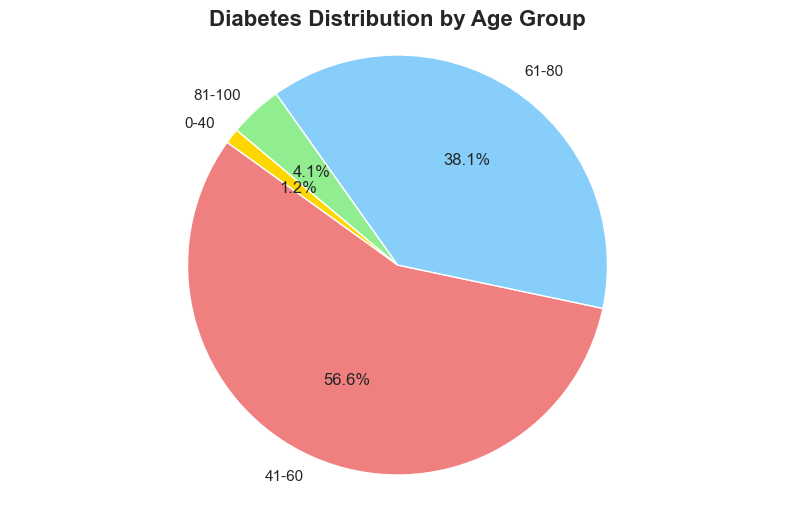

In [72]:
# Create Age Groups
age_bins = [0, 40, 60, 80, 100]
age_labels = ['0-40', '41-60', '61-80', '81-100']
hf['age_group'] = pd.cut(hf['age'], bins=age_bins, labels=age_labels)

# Aggregate Data
age_group_diabetes = hf[hf['diabetes'] == 1]['age_group'].value_counts().sort_index()

# Create a Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(age_group_diabetes, labels=age_group_diabetes.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Diabetes Distribution by Age Group', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


C:\Users\miracle\AppData\Local\Temp\ipykernel_5704\805490894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y='age', data=hf, palette='Set2')


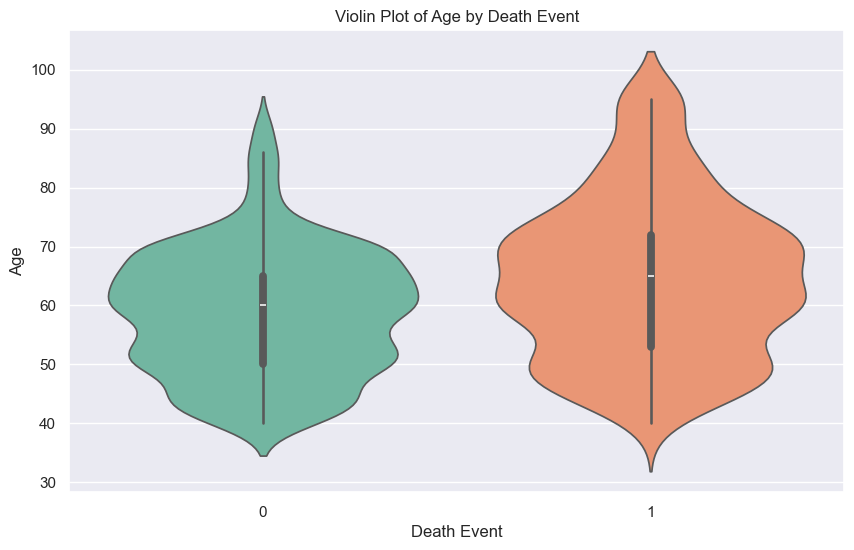

In [71]:
# Violin Plot for Age
plt.figure(figsize=(10, 6))
sns.violinplot(x='DEATH_EVENT', y='age', data=hf, palette='Set2')
plt.title('Violin Plot of Age by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

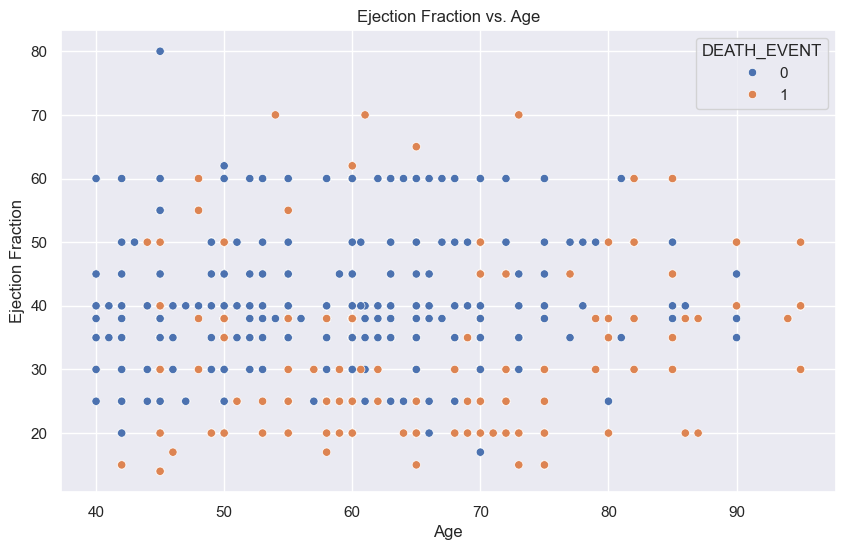

In [65]:
# Scatter Plot for Ejection Fraction vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=hf)
plt.title('Ejection Fraction vs. Age')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.show()


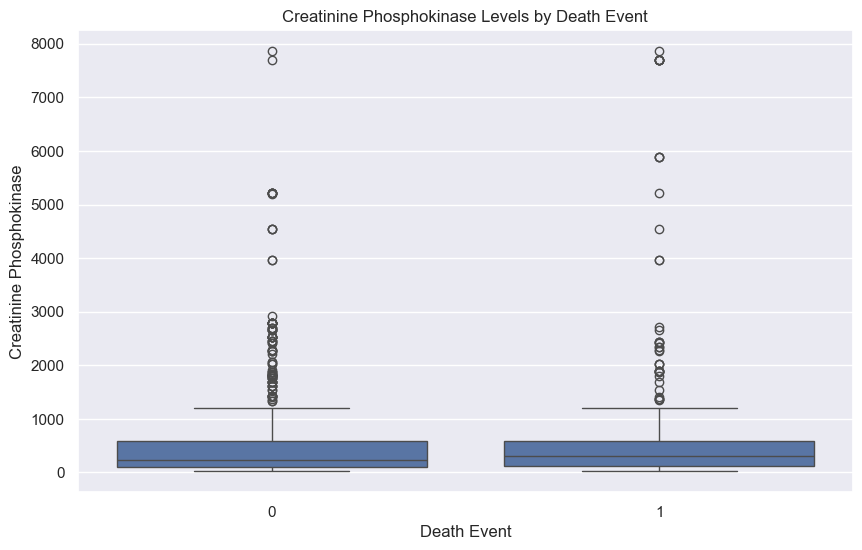

In [64]:
# Box Plot for Creatinine Phosphokinase
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=hf)
plt.title('Creatinine Phosphokinase Levels by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Creatinine Phosphokinase')
plt.show()

C:\Users\miracle\AppData\Local\Temp\ipykernel_5704\1622376808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anaemia', data=hf, palette='Set2')


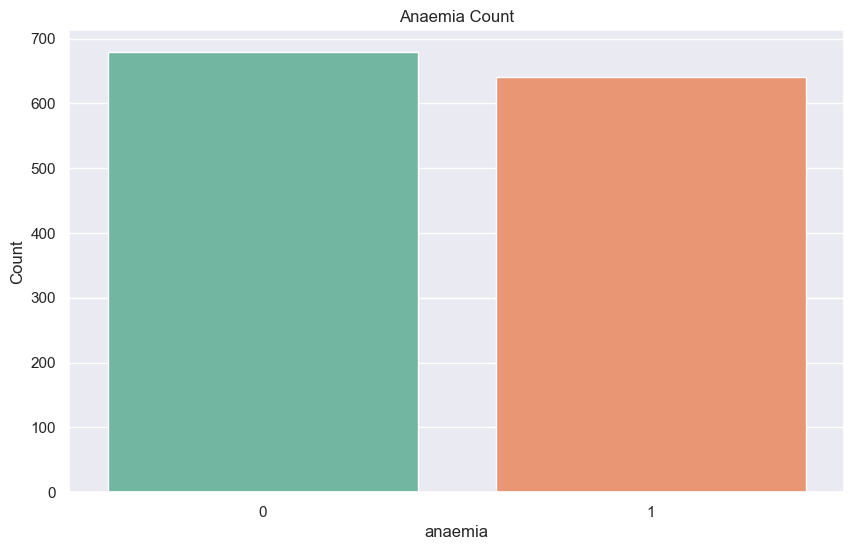

In [63]:
# Bar Chart for Anaemia
plt.figure(figsize=(10, 6))
sns.countplot(x='anaemia', data=hf, palette='Set2')
plt.title('Anaemia Count')
plt.xlabel('anaemia')
plt.ylabel('Count')
plt.show()

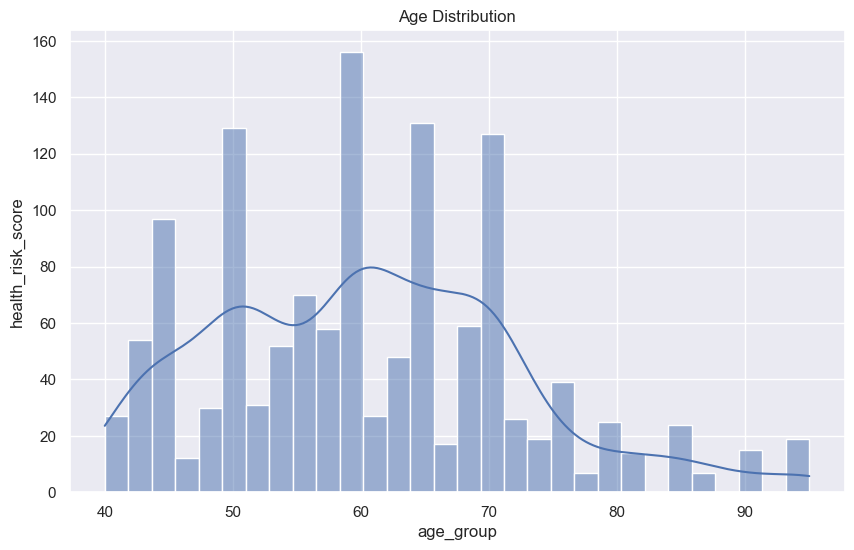

In [62]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(hf['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('age_group')
plt.ylabel('health_risk_score')
plt.show()

(-1.09999807321541,
 1.0999971485473572,
 -1.0999969200979947,
 1.0999974859627188)

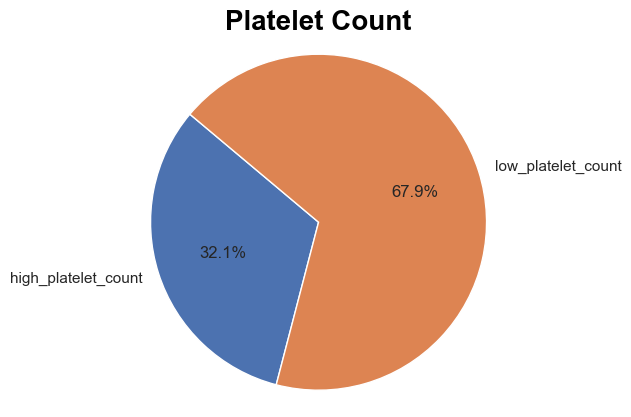

In [58]:

labels = ['high_platelet_count', 'low_platelet_count']
sizes = [hf["high_platelet_count"].sum(), hf["low_platelet_count"].sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Platelet Count', fontsize=20, fontweight="bold", color="black")

plt.axis('equal')

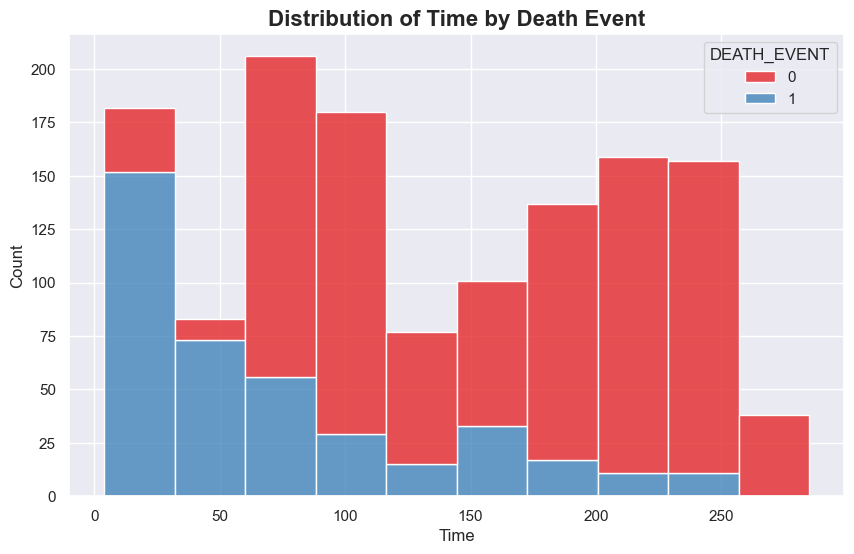

In [76]:
# Create Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=hf, x='time', hue='DEATH_EVENT', multiple='stack', palette='Set1', bins=10)
plt.title('Distribution of Time by Death Event', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)

# Display the Histogram
plt.show()


In [77]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,high_platelet_count,low_platelet_count,cpk_level,creatinine_sodium_ratio,time_years,health_risk_score,ejection_fraction_category,smoking_status,time_to_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0,41-60,False,False,High,0.009489,0.241096,56.0,Normal,Smoker,NaN
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0,61-80,False,False,Normal,0.038462,0.567123,65.0,Low,Non-Smoker,NaN
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0,41-60,False,False,Elevated,0.006429,0.668493,46.0,Low,Non-Smoker,NaN
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0,41-60,False,False,High,0.009524,0.246575,62.0,Low,Non-Smoker,NaN
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1,81-100,True,False,Elevated,0.015152,0.136986,95.0,Low,Non-Smoker,50.0


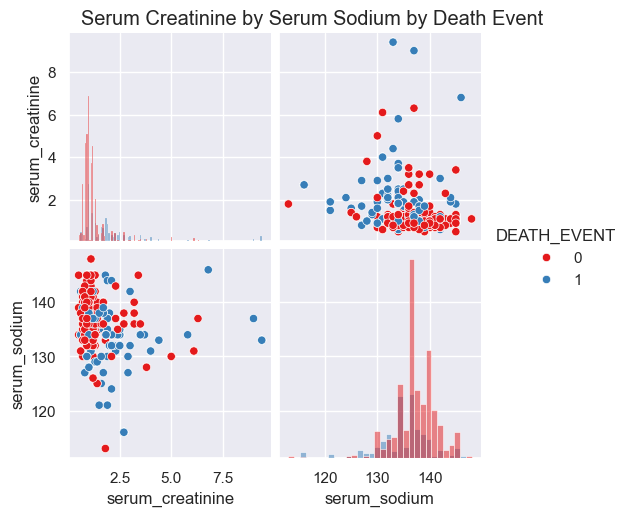

In [79]:
# Scatter Plot Matrix - Serum Creatinine vs. Serum Sodium vs. DEATH_EVENT
sns.pairplot(hf, vars=['serum_creatinine', 'serum_sodium'], hue='DEATH_EVENT', diag_kind='hist', palette='Set1')
plt.suptitle('Serum Creatinine by Serum Sodium by Death Event', y=1.02)
plt.show()

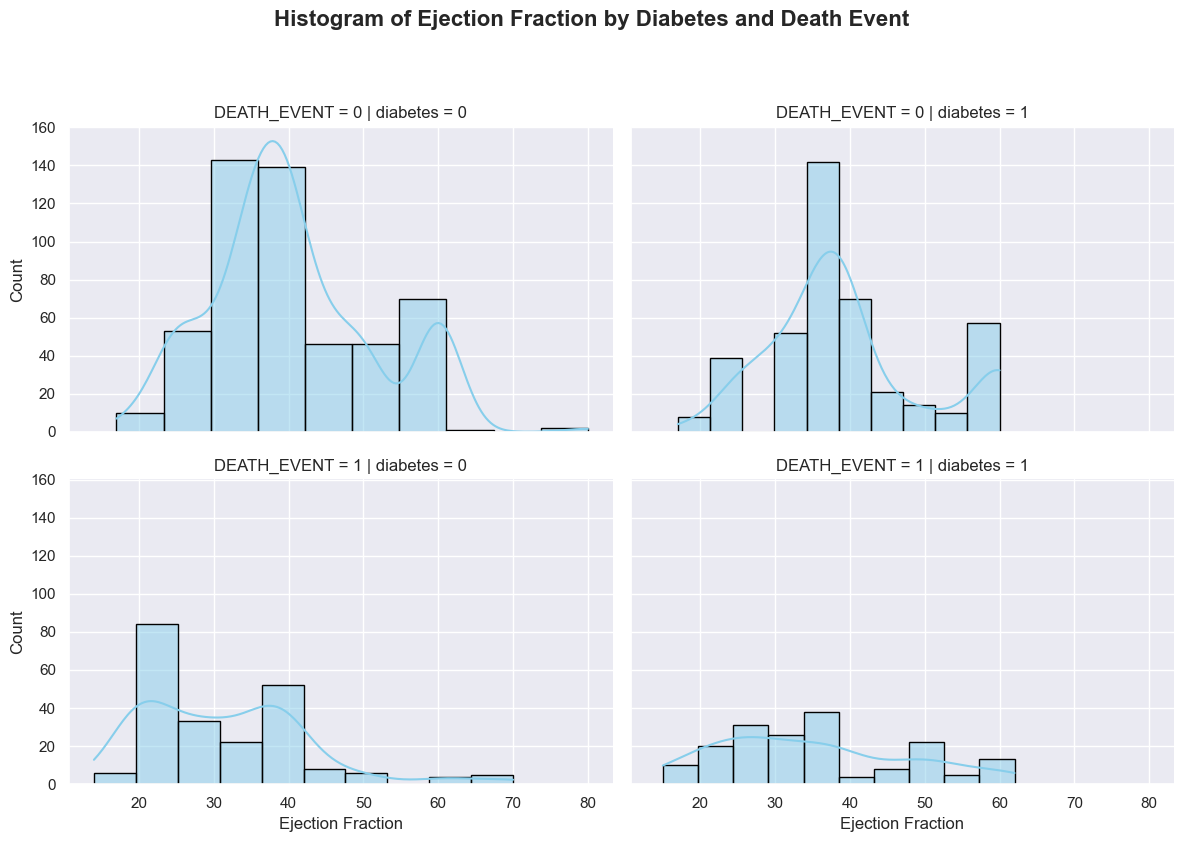

In [81]:
# Facet Grid of Histograms of ejection by diabestes by death
g = sns.FacetGrid(hf, col='diabetes', row='DEATH_EVENT', height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x='ejection_fraction', bins=10, kde=True, color='skyblue', edgecolor='black')
g.set_axis_labels('Ejection Fraction', 'Count')
g.fig.suptitle('Histogram of Ejection Fraction by Diabetes and Death Event', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

In [84]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,high_platelet_count,low_platelet_count,cpk_level,creatinine_sodium_ratio,time_years,health_risk_score,ejection_fraction_category,smoking_status,time_to_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0,51-60,False,False,High,0.009489,0.241096,56.0,Normal,Smoker,NaN
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0,61-70,False,False,Normal,0.038462,0.567123,65.0,Low,Non-Smoker,NaN
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0,0-50,False,False,Elevated,0.006429,0.668493,46.0,Low,Non-Smoker,NaN
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0,51-60,False,False,High,0.009524,0.246575,62.0,Low,Non-Smoker,NaN
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1,91-100,True,False,Elevated,0.015152,0.136986,95.0,Low,Non-Smoker,50.0


C:\Users\miracle\AppData\Local\Temp\ipykernel_5704\3895338192.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_event_counts = hf.groupby(['age_group', 'smoking'])['DEATH_EVENT'].value_counts(normalize=True).unstack().fillna(0)


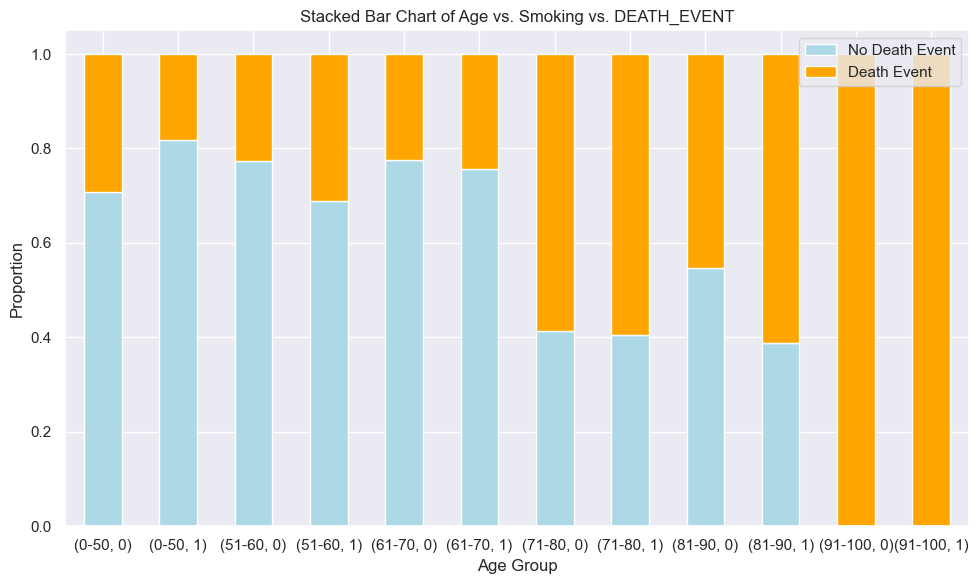

In [82]:
# Stacked bar chart
age_bins = [0, 50, 60, 70, 80, 90, 100]
age_labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
hf['age_group'] = pd.cut(hf['age'], bins=age_bins, labels=age_labels)

death_event_counts = hf.groupby(['age_group', 'smoking'])['DEATH_EVENT'].value_counts(normalize=True).unstack().fillna(0)

# Create stacked bar chart
death_event_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])
plt.title('Stacked Bar Chart of Age vs. Smoking vs. DEATH_EVENT')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['No Death Event', 'Death Event'], loc='upper right')
plt.tight_layout()
plt.show()

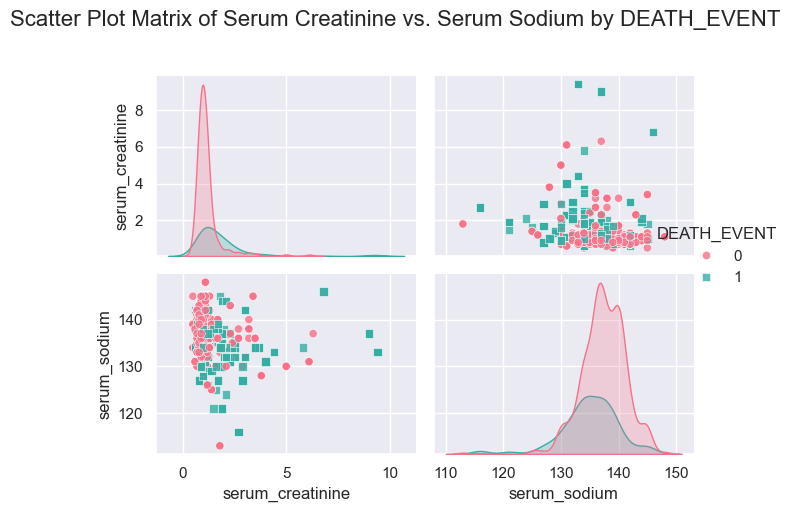

In [87]:
# catter plot matrix
sns.pairplot(hf, vars=['serum_creatinine', 'serum_sodium'], hue='DEATH_EVENT', palette='husl', markers=['o', 's'], plot_kws={'alpha': 0.8})
plt.suptitle('Scatter Plot Matrix of Serum Creatinine vs. Serum Sodium by DEATH_EVENT', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()